In [1]:
import requests
import json
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

lat = "40.7380"
lon = "-73.8801"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/40.738,-73.8801',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-73.8801, 40.738]},
 'properties': {'@id': 'https://api.weather.gov/poi

In [2]:
forecast = json_file['properties']['forecast']
new_request = requests.get(forecast)
json_file_2 = new_request.json()

In [3]:
#Question 1
csv_file = open("weather_forecast.csv", "w", newline = "", encoding = "utf-8")
csv_writer = csv.writer(csv_file)
csv_writer.writerow(["Day", "Temperature", "Description"])

for i in range(0,14):
    day = json_file_2['properties']['periods'][i]['name']
    temp = json_file_2['properties']['periods'][i]['temperature']
    detail = json_file_2['properties']['periods'][i]['detailedForecast']
        
    csv_writer.writerow([day, temp, detail])
csv_file.close()

In [4]:
data_sheet = pd.read_csv("weather_forecast.csv")
data_sheet

,Day,Temperature,Description
0,Tonight,41,"Mostly clear, with a low around 41. Southwest ..."
1,Tuesday,61,"Sunny, with a high near 61. Southwest wind 7 t..."
2,Tuesday Night,46,"Mostly cloudy. Low around 46, with temperature..."
3,Wednesday,58,A slight chance of rain showers after 2pm. Mos...
4,Wednesday Night,48,A slight chance of rain showers. Mostly cloudy...
5,Thursday,64,A chance of rain showers. Cloudy. High near 64...
6,Thursday Night,49,"A chance of rain showers. Cloudy, with a low a..."
7,Friday,54,"Rain showers likely. Cloudy, with a high near ..."
8,Friday Night,43,"A chance of rain showers. Cloudy, with a low a..."
9,Saturday,50,"Rain showers likely. Cloudy, with a high near ..."


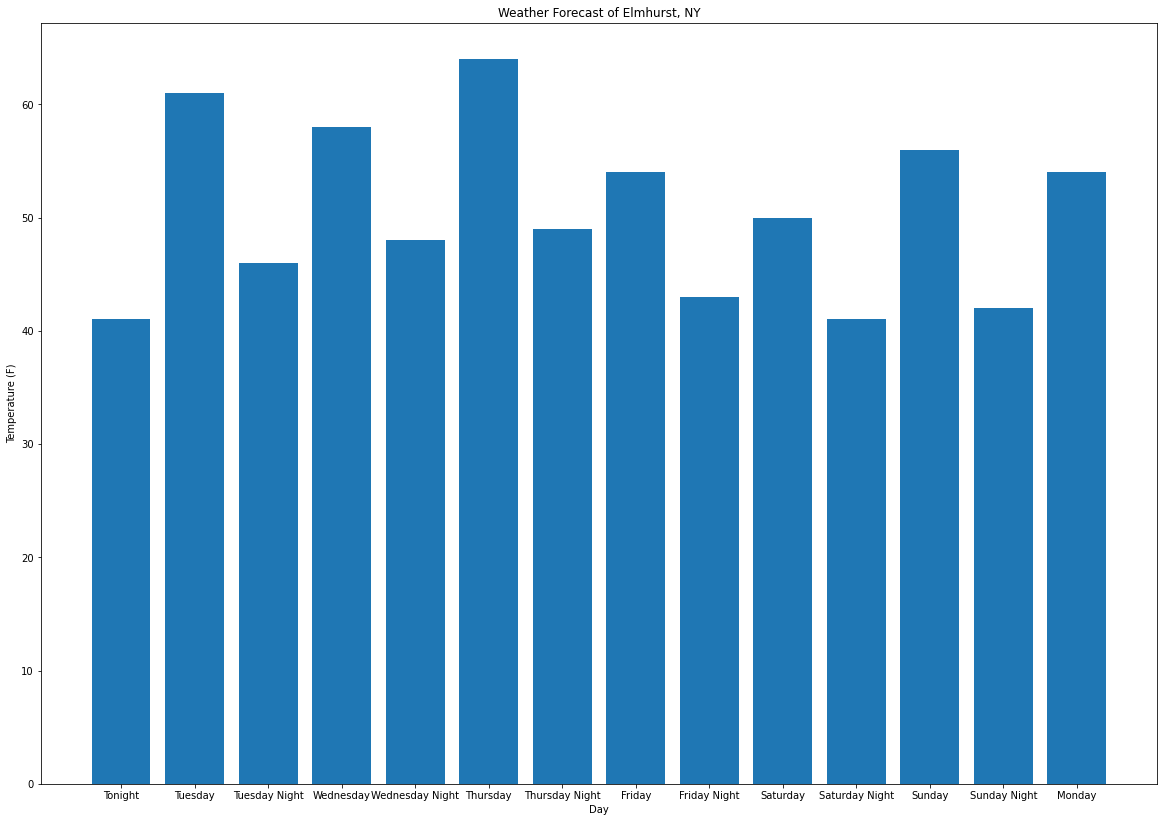

In [5]:
df = pd.DataFrame(data_sheet)
x = df["Day"]
y = df["Temperature"]

fig = plt.figure(figsize = (20,14)) #Bonus 1: To make the words less squished together, I increased the figure size. i already knew how to do this from the data project in HARP 150.
plt.bar(x, y)

plt.xlabel("Day")
plt.ylabel("Temperature (F)")
plt.title("Weather Forecast of Elmhurst, NY")

plt.show()

In [13]:
#Question 2
countryCode = "AU" #country code for Australia. the following outputs are related to Australia.
year = 2023

#call 1 allows users to get information about a specified country chosen by them. The country is specified by country code which replaces {countryCode} in the url.
req = requests.get(f"https://date.nager.at/api/v3/CountryInfo/{countryCode}")
json_info = req.json()
json_info

{'commonName': 'Australia',
 'officialName': 'Commonwealth of Australia',
 'countryCode': 'AU',
 'region': 'Oceania',
 'borders': []}

In [7]:
#call 2 allows users to get dictionary of eligible countries and their country codes that they can get information on.
req2 = requests.get(f"https://date.nager.at/api/v3/AvailableCountries")
json_countries = req2.json()
json_countries

[{'countryCode': 'AD', 'name': 'Andorra'},
 {'countryCode': 'AL', 'name': 'Albania'},
 {'countryCode': 'AR', 'name': 'Argentina'},
 {'countryCode': 'AT', 'name': 'Austria'},
 {'countryCode': 'AU', 'name': 'Australia'},
 {'countryCode': 'AX', 'name': 'Åland Islands'},
 {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'},
 {'countryCode': 'BB', 'name': 'Barbados'},
 {'countryCode': 'BE', 'name': 'Belgium'},
 {'countryCode': 'BG', 'name': 'Bulgaria'},
 {'countryCode': 'BJ', 'name': 'Benin'},
 {'countryCode': 'BO', 'name': 'Bolivia'},
 {'countryCode': 'BR', 'name': 'Brazil'},
 {'countryCode': 'BS', 'name': 'Bahamas'},
 {'countryCode': 'BW', 'name': 'Botswana'},
 {'countryCode': 'BY', 'name': 'Belarus'},
 {'countryCode': 'BZ', 'name': 'Belize'},
 {'countryCode': 'CA', 'name': 'Canada'},
 {'countryCode': 'CH', 'name': 'Switzerland'},
 {'countryCode': 'CL', 'name': 'Chile'},
 {'countryCode': 'CN', 'name': 'China'},
 {'countryCode': 'CO', 'name': 'Colombia'},
 {'countryCode': 'CR', 'name':

In [8]:
#call 3 allows users to get a dictionary of start and end dates/lengths long weekends of a their chosen country in a specific year.
req3 = requests.get(f"https://date.nager.at/api/v3/LongWeekend/{year}/{countryCode}")
json_lw = req3.json()
json_lw

[{'startDate': '2023-01-26',
  'endDate': '2023-01-29',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-04-07',
  'endDate': '2023-04-10',
  'dayCount': 4,
  'needBridgeDay': False},
 {'startDate': '2023-04-22',
  'endDate': '2023-04-25',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-12-23',
  'endDate': '2023-12-26',
  'dayCount': 4,
  'needBridgeDay': False}]

In [9]:
#call 4 allows users to get all public holidays of a specified country in a specific year, both are of their own chosing.
req4 = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{year}/{countryCode}")
json_ph = req4.json()
json_ph

[{'date': '2023-01-01',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'AU',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-01-26',
  'localName': 'Australia Day',
  'name': 'Australia Day',
  'countryCode': 'AU',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-06',
  'localName': 'Labour Day',
  'name': 'Labour Day',
  'countryCode': 'AU',
  'fixed': False,
  'global': False,
  'counties': ['AU-WA'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-13',
  'localName': 'Canberra Day',
  'name': 'Canberra Day',
  'countryCode': 'AU',
  'fixed': False,
  'global': False,
  'counties': ['AU-ACT'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-13',
  'localName': 'March Public Holiday',
  'name': 'March Public Holiday',
  'countryCode': 'AU',
  'fixed': False,
  'global': False,
  'co

In [42]:
#call 5 allows users to determine whether the current day is a public holiday
req5 = requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/{countryCode}")
json_today = req5.json()
json_today #not sure why this one isn't working

JSONDecodeError: [Errno Expecting value] : 0

In [12]:
#call 6 /api/v3/NextPublicHolidays/{countryCode} provides users with upcoming public holidays within the next 365 days for any specific country of their chosing using country codes similar to other calls.
req6 = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{year}/{countryCode}")
json_ph2 = req6.json()
json_ph2

[{'date': '2023-01-01',
  'localName': "New Year's Day",
  'name': "New Year's Day",
  'countryCode': 'AU',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-01-26',
  'localName': 'Australia Day',
  'name': 'Australia Day',
  'countryCode': 'AU',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-06',
  'localName': 'Labour Day',
  'name': 'Labour Day',
  'countryCode': 'AU',
  'fixed': False,
  'global': False,
  'counties': ['AU-WA'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-13',
  'localName': 'Canberra Day',
  'name': 'Canberra Day',
  'countryCode': 'AU',
  'fixed': False,
  'global': False,
  'counties': ['AU-ACT'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-13',
  'localName': 'March Public Holiday',
  'name': 'March Public Holiday',
  'countryCode': 'AU',
  'fixed': False,
  'global': False,
  'co

In [14]:
#call 7 provides users with upcoming public holidays within the next 7 days in all countries.
req7 = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
json_ph3 = req7.json()
json_ph3

[{'date': '2023-03-20',
  'localName': 'Día de San José',
  'name': "Saint Joseph's Day",
  'countryCode': 'CO',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'San José',
  'name': "St. Joseph's Day",
  'countryCode': 'ES',
  'fixed': True,
  'global': False,
  'counties': ['ES-MD'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Natalicio de Benito Juárez',
  'name': "Benito Juárez's birthday",
  'countryCode': 'MX',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Otago Anniversary Day',
  'name': 'Otago Anniversary Day',
  'countryCode': 'NZ',
  'fixed': False,
  'global': False,
  'counties': ['NZ-OTA'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'TN',

In [36]:
#Question 3
class Holiday_Counter: #creates reusable function that counts holidays of each country
    def __init__(self, country):
        self.country = country
    def count(self):
        response = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2023/{self.country}")
        json_holidays = response.json()
        counter = len(json_holidays)
        print(counter)

In [55]:
country_Code = ["FR", "CN", "IT", "CA", "VE", "JP", "PR", "MG", "GR", "SE"] #list of 10 countries that will be iterated through to have their number of public holidays returned in the output.

for i in country_Code: #placed function within a loop so that the list of country codes is iterated through and the country code in the url is replaced. function will repeat and return the number of public holidays of all countries in the list.
    holidays = Holiday_Counter(i)
    holidays.count()

11
7
12
30
38
16
21
10
15
16
